In [1]:
import numpy as np
import matplotlib
font = {'size': 11.0}
matplotlib.rc('font', **font)
import matplotlib.pyplot as plt
import pandas as pd

from scipy.optimize import curve_fit
import uncertainties.unumpy as unp
from uncertainties.unumpy import (nominal_values as noms, std_devs as stds)
from uncertainties import ufloat
import scipy.constants as const

In [2]:
B,I = np.genfromtxt('data/data1.txt'
                  ,unpack=True
                  ,delimiter = ","
                  ,skip_header = 2
                   )
df = pd.read_csv('data/data1.txt'
                 ,header =[1])

In [3]:
def f(x,a,b,c,d):
    return a*x+b*x**2+c*x**3+d

def g(x,a,b):
    return a*x+b

In [4]:
df

,B,I
0,20,0.2
1,38,0.4
2,59,0.6
3,80,0.8
4,98,1.0
5,119,1.2
6,140,1.4
7,159,1.6
8,179,1.8
9,201,2.0


In [5]:
params1,cov = curve_fit(f,df['I'],df['B'])
errors = np.sqrt(np.diag(cov))
params1_err = unp.uarray(params1,errors)
err = params1_err[0]*df['I']+params1_err[1]*df['I']**2+params1_err[2]*df['I']**3+params1_err[3]

params2,cov = curve_fit(g,df['I'][0:25],df['B'][0:25])
errors = np.sqrt(np.diag(cov))
params2_err = unp.uarray(params2,errors)
err = params2_err[0]*df['I']+params2_err[1]

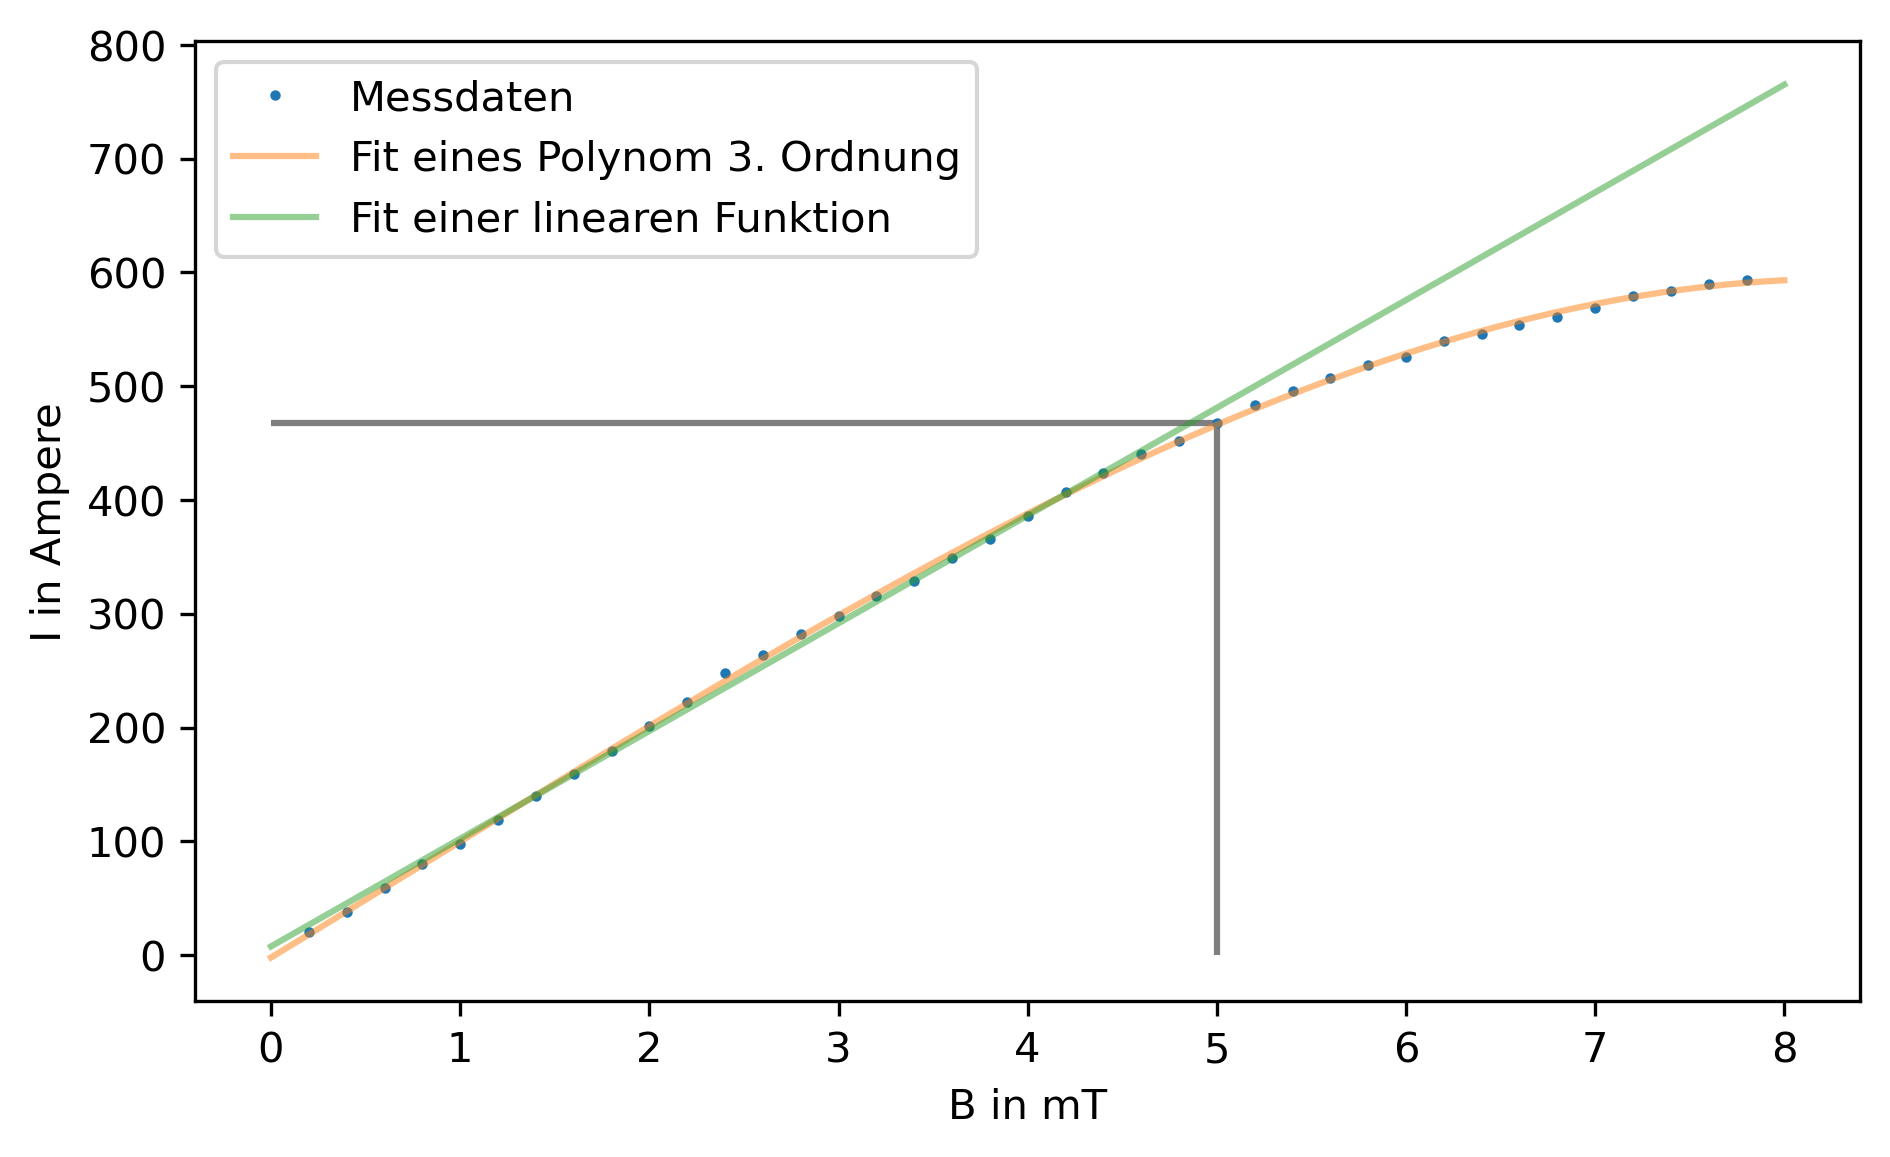

In [6]:
x = np.linspace(0,8,1000)

plt.figure(figsize=(6.4,3.96),dpi=300)
plt.plot(df['I']
         ,df['B']
         ,'.'
         ,ms = 3
         ,label = 'Messdaten'
        )
if True:
    plt.vlines(ymin = 0
           ,ymax = 468
           ,x = 5
           ,color = 'k'
           ,alpha = 0.5
          )
    plt.hlines(xmin = 0
           ,xmax = 5
           ,y = 468
           ,color = 'k'
           ,alpha = 0.5
          )
plt.plot(x
         ,f(x,*params1)
         ,alpha = 0.5
         ,label = 'Fit eines Polynom 3. Ordnung'
        )
plt.plot(x
         ,g(x,*params2)
         ,alpha = 0.5
         ,label = 'Fit einer linearen Funktion'
        )
plt.xlabel('B in mT')
plt.ylabel(f'I in Ampere')
plt.legend(loc = 'best')
plt.tight_layout()

In [21]:
df1 = pd.read_csv('data/data_blau_senkrecht.txt'
                 ,header =[1])
df2 = pd.read_csv('data/data_rot_senkrecht.txt'
                 ,header =[1])

lam = [643.8 *10**(-7), 480 *10**(-7), 480* 10**(-7)]  
d = 0.004  
L = 0.12  
n = [1.4567, 1.4635, 1.4635]  

In [22]:
def delta_lambda(lam,n,d):
    """Caculates the Dispersion area from the thickness, the wavelength and the difraction index

        Parameters
        ----------
        lam: float
            The wavelength lambda in meters
        n: float
            The diffraction index of the material
        d: float
            The thickness of the material in meters.

        Returns
        -------
        delta_lambda: float
            The Disperison region for the material with the specified wavelength.
    """
    delta_lambda = lam**2/(2*d)*np.sqrt(1/(n**2-1))
    return delta_lambda

In [23]:
def add_del_lambda(df,lam,n):
    """Adds the Dispersion region to the given data frame.

        Parameters
        ----------
        df: pandas data frame
            The data frame with the information.
        lam: float
            The wavelength lambda in meters
        n: float
            The diffraction index of the material
            

        Returns
        -------
        df: pandas data frame
            Data Frame with the added Disperion region
    """
    df['del_lambda'] = 0.5*(df['del_s']/df['delta_s'])*delta_lambda(lam,n,0.004)
    df['del_lambda_err'] = 0.5*df['del_lambda']*np.sqrt((3/df['delta_s'])**2+(3/df['del_s'])**2)
    return df

In [24]:
def get_landre(del_lam,B,lam):
    """Adds the Dispersion region to the given data frame.

        Parameters
        ----------
        del_lam: float
            The wavelength difference in meters
        lam: float
            The wavelength lambda in meters
        B: float
            The magnetic field strength in Tesla
            

        Returns
        -------
        g: float
            The Landre Factor
    """
    g = del_lam*(const.h*const.c)/(const.physical_constants['Bohr magneton'][0]*B*lam**2)
    return g

In [35]:
def relative_unc(guess,true):
    return (guess-true)/true

In [25]:
df1 = add_del_lambda(df1,6.438*10**(-7),1.4567)

In [26]:
# The further used del_lambda is the mean of the del_lambda in the df
del_lambda1 = df1['del_lambda'].mean(axis = 0)
del_lambda1_err = 1/np.sqrt(len(df1['del_lambda_err']))*np.sqrt(sum(df1['del_lambda_err']**2))

del_lambda1_unc = ufloat(del_lambda1, del_lambda1_err)

In [27]:
del_lambda1_unc

1.647655738286651e-11+/-1.1356931536094135e-12

In [28]:
df1

,delta_s,del_s,del_lambda,del_lambda_err
0,38,25,1.608966e-11,1.155566e-12
1,39,25,1.567710e-11,1.117294e-12
2,37,24,1.586353e-11,1.181784e-12
3,39,27,1.693127e-11,1.144047e-12
4,39,26,1.630419e-11,1.130492e-12
5,40,26,1.589658e-11,1.093825e-12
6,38,27,1.737683e-11,1.184253e-12
7,39,28,1.755835e-11,1.157945e-12
8,40,27,1.650799e-11,1.106487e-12
9,41,27,1.610535e-11,1.071328e-12


In [29]:
B_feld = f(7.8,*params1)*10**(-3)
B_feld

0.5908564723395322

In [30]:
get_landre(del_lambda1_unc,B_feld,6.438*10**(-7))
#1.75

1.441091982960469+/-0.0993313263650276

In [39]:
relative_unc(get_landre(del_lambda1_unc,B_feld,6.438*10**(-7)),1.75)

-0.17651886687973203+/-0.05676075792287291

In [31]:
df2 = add_del_lambda(df2,4.8*10**(-7),1.4635)

In [32]:
del_lambda2 = df2['del_lambda'].mean(axis = 0)
del_lambda2_err = 1/np.sqrt(len(df2['del_lambda_err']))*np.sqrt(sum(df2['del_lambda_err']**2))#df2['del_lambda_err'].mean(axis = 0)

del_lambda2_unc = ufloat(del_lambda2, del_lambda2_err)

In [33]:
del_lambda2_unc

7.198297067523555e-12+/-3.700643057236571e-13

In [34]:
get_landre(del_lambda2_unc,B_feld,4.8*10**(-7))
#1.00

1.1325945370243282+/-0.058226662095026596

In [36]:
relative_unc(get_landre(del_lambda2_unc,B_feld,4.8*10**(-7)),1)

0.13259453702432822+/-0.058226662095026596